In [1]:
import os
import wget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
file = 'exercise.csv'
if os.path.isfile(file):
    print('file exist')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv', file)

file exist


In [3]:
df = pd.read_csv(file)

In [4]:
df = df.rename(columns={'Car Model':'car_model', 'Mileage':'mileage', 'Sell Price($)':'price', 'Age(yrs)':'age'})

In [5]:
df

,car_model,mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [6]:
dummies = pd.get_dummies(df['car_model'])

In [7]:
df = pd.concat((df, dummies), axis=1)

In [8]:
df

,car_model,mileage,price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [9]:
df['price'] = df.pop('price')

In [10]:
df.drop(columns=['car_model', 'Mercedez Benz C class'], inplace=True)

In [11]:
df = df.rename(columns={'Audi A5':'audi','BMW X5':'bmw'})

In [12]:
df

,mileage,age,audi,bmw,price
0,69000,6,0,1,18000
1,35000,3,0,1,34000
2,57000,5,0,1,26100
3,22500,2,0,1,40000
4,46000,4,0,1,31500
5,59000,5,1,0,29400
6,52000,5,1,0,32000
7,72000,6,1,0,19300
8,91000,8,1,0,12000
9,67000,6,0,0,22000


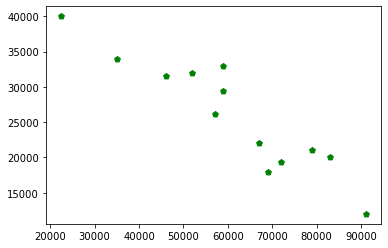

In [13]:
%matplotlib inline
plt.scatter(df['mileage'], df['price'], marker = 'p', color ='green')

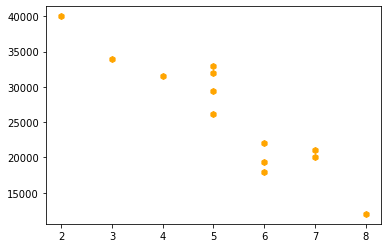

In [14]:
%matplotlib inline
plt.scatter(df['age'], df['price'], marker = 'h', color ='orange')

In [15]:
lreg = linear_model.LinearRegression()
X = df.drop(columns=['price'])
y = df['price']
lreg.fit(X,y)

LinearRegression()

In [16]:
lreg.predict([[45000, 4, 0, 0], [86000, 7, 0, 1]])

array([36991.31721061, 11080.74313219])

In [17]:
df['predict_price'] = pd.Series(lreg.predict(X)).rename('predicted_price')

In [18]:
df

,mileage,age,audi,bmw,price,predict_price
0,69000,6,0,1,18000,18705.272364
1,35000,3,0,1,34000,35286.784456
2,57000,5,0,1,26100,24479.191125
3,22500,2,0,1,40000,41245.764264
4,46000,4,0,1,31500,29882.987791
5,59000,5,1,0,29400,28023.613524
6,52000,5,1,0,32000,30614.468185
7,72000,6,1,0,19300,21879.572670
8,91000,8,1,0,12000,12182.345621
9,67000,6,0,0,22000,26183.723879


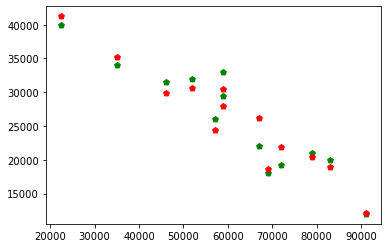

In [19]:
%matplotlib inline
plt.scatter(df['mileage'], df['price'], marker = 'p', color ='green')
plt.scatter(df['mileage'], df['predict_price'], marker = 'p', color ='red')

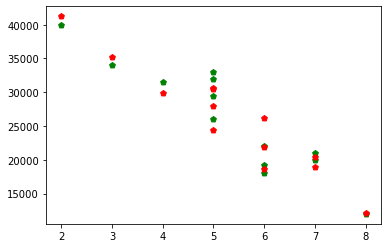

In [20]:
%matplotlib inline
plt.scatter(df['age'], df['price'], marker = 'p', color ='green')
plt.scatter(df['age'], df['predict_price'], marker = 'p', color ='red')